# Simple Perceptron

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'yellow', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Reading and plotting the data

In [2]:
!pwd

/home/campos/projects/artificial_inteligence/deep_learning/perceptron/examples


In [5]:
data = pd.read_csv('../data/data.csv',
                   encoding='utf8',
                   delimiter=',',
                   verbose=True,
                   header=None)

Tokenization took: 0.05 ms
Type conversion took: 0.48 ms
Parser memory cleanup took: 0.01 ms


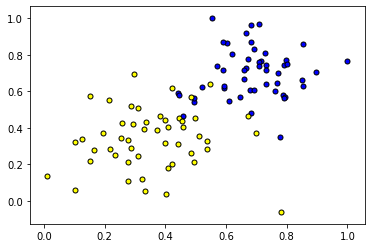

In [6]:
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [7]:
type(X)

numpy.ndarray

## Implementing the basic functions

- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

- Output (prediction)

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

In [9]:
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

In [10]:
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

- **Gradient Descent**:The function that updates the weights 

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [11]:
# gradient descent
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = -(y - output)
    weights -= learnrate * d_error * x
    bias -= learnrate * d_error
    return weights, bias

## Train Model

In [14]:
def train(features: 'numpy.ndarray', targets: 'numpy.ndarray',
          epochs: int, learnrate: float, graph_lines:bool = False):
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    
    for e in range(epochs):
        
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        
            
        plt.title("Solution boundary")
        display(-weights[0]/weights[1], -bias/weights[1], 'black')

        # Plotting the data
        plot_points(features, targets)
        plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

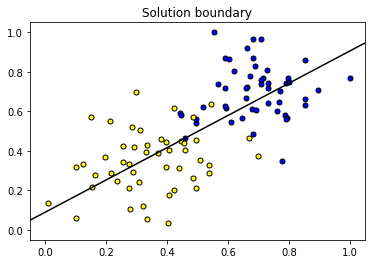

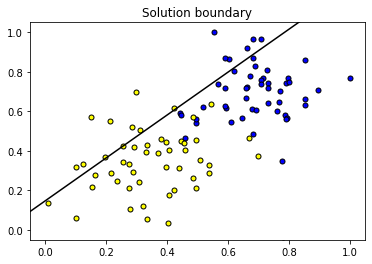

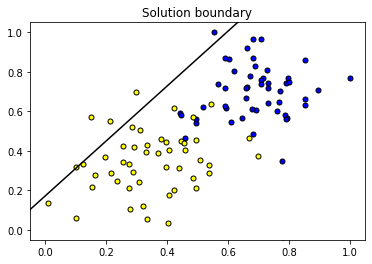

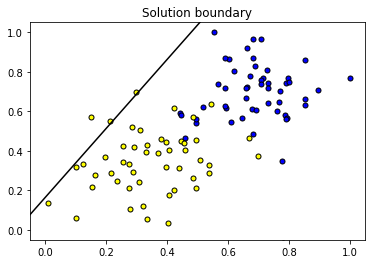

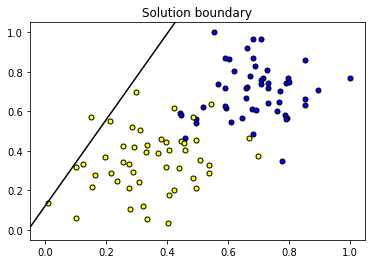

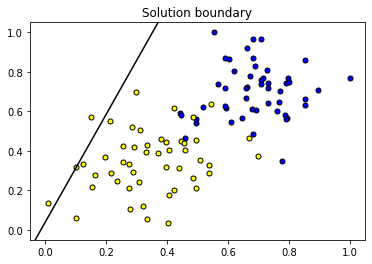

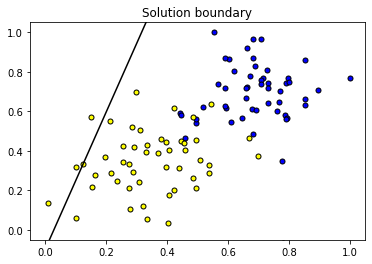

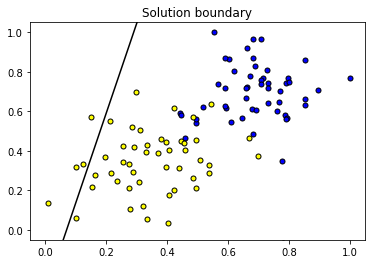

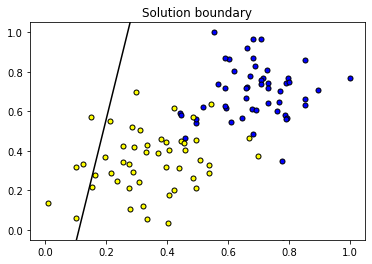

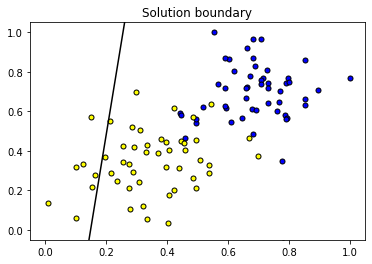

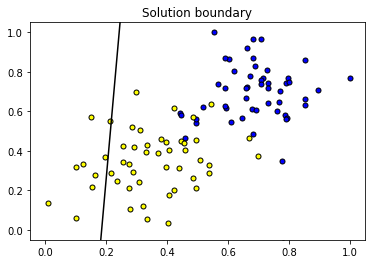

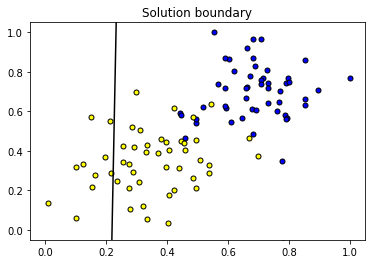

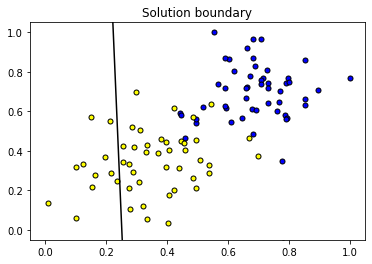

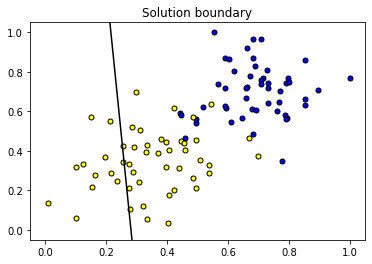

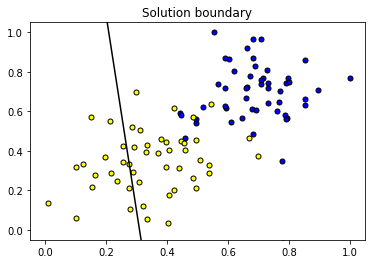

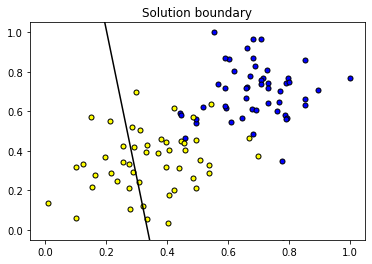

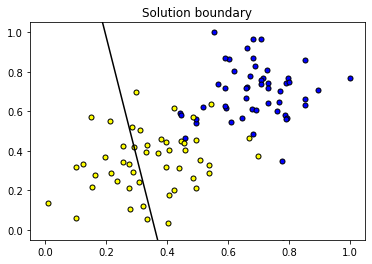

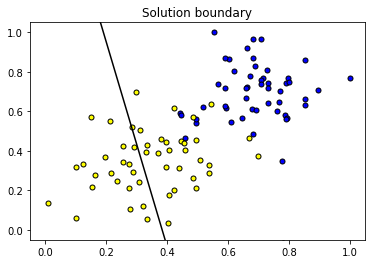

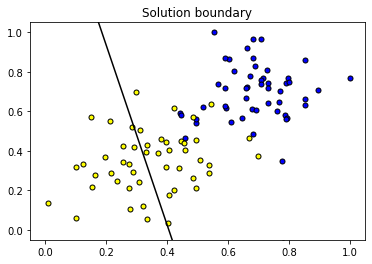

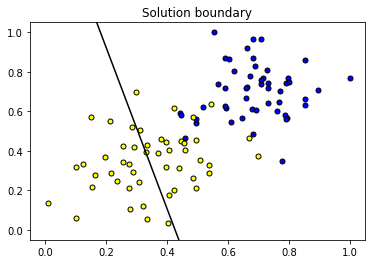

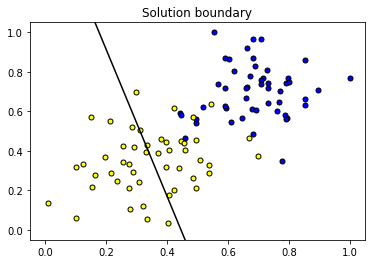

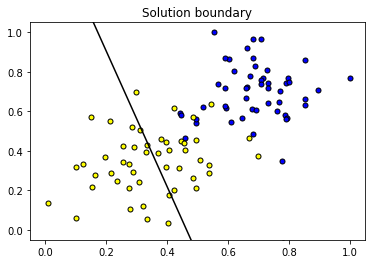

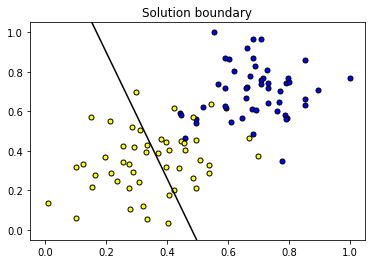

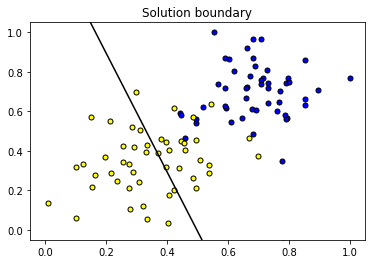

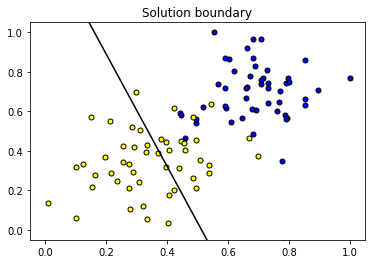

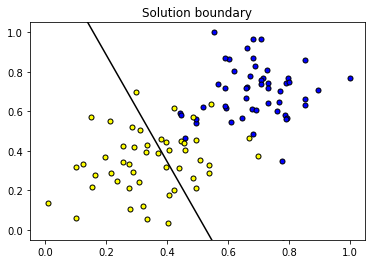

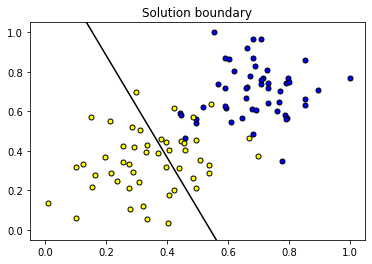

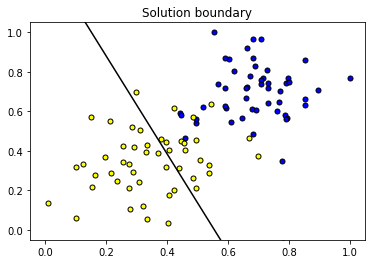

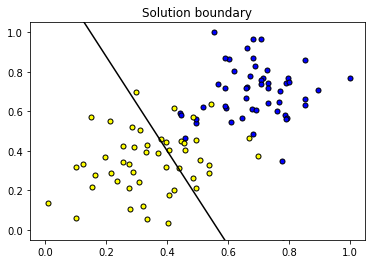

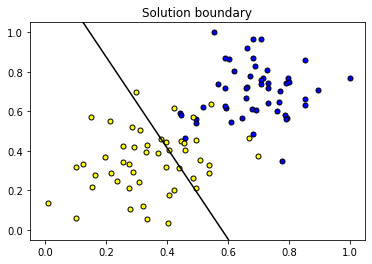

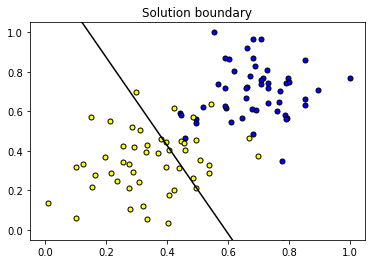

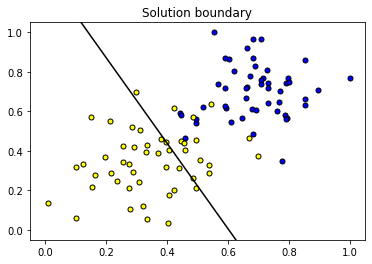

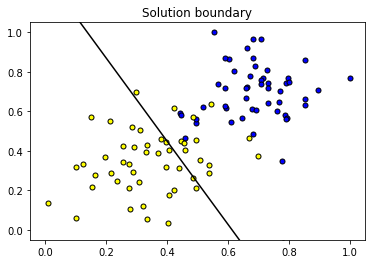

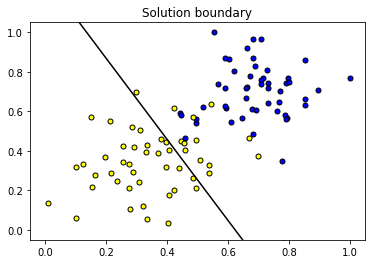

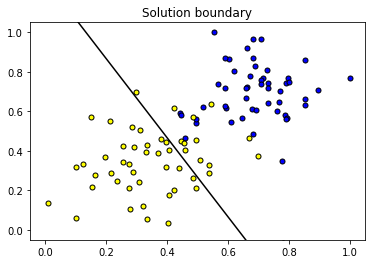

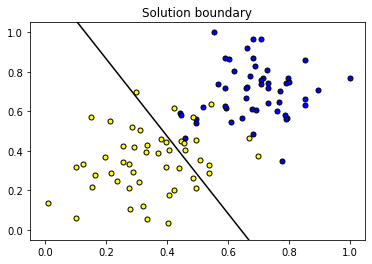

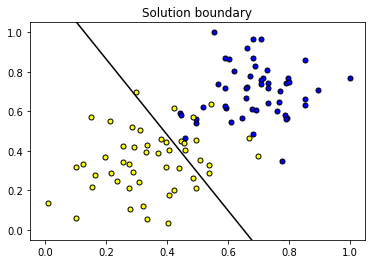

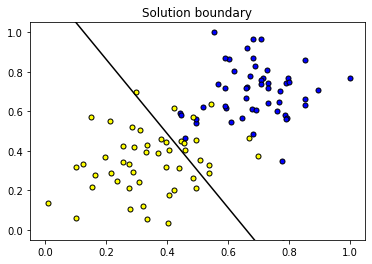

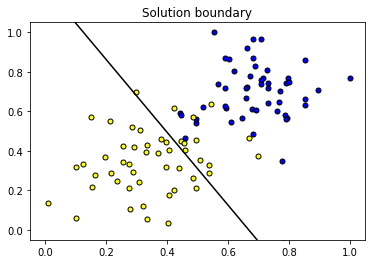

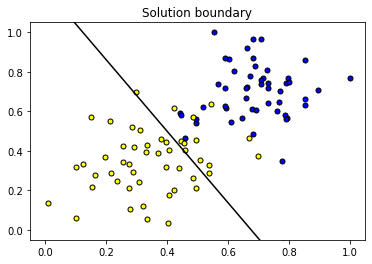

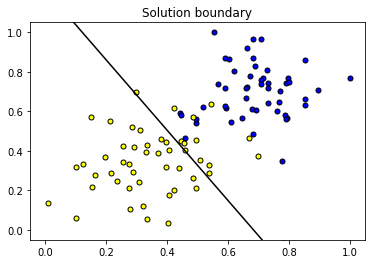

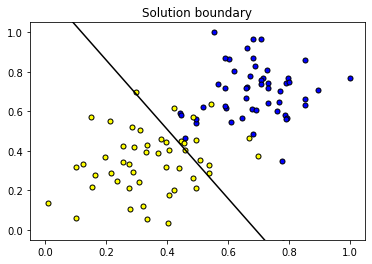

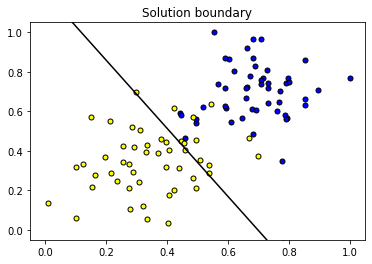

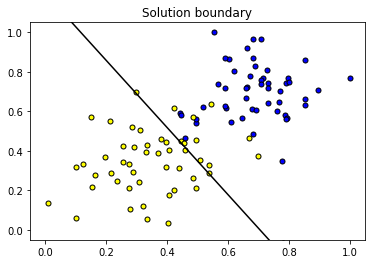

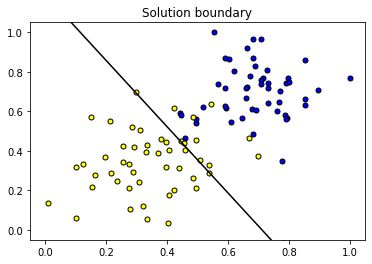

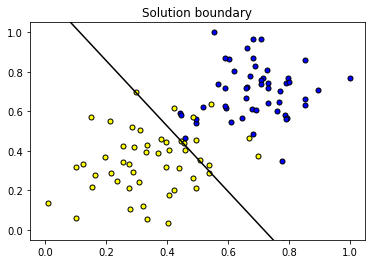

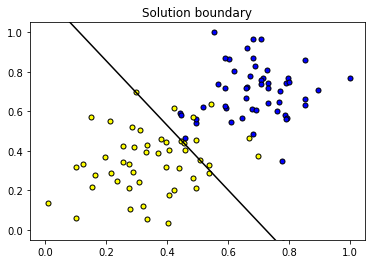

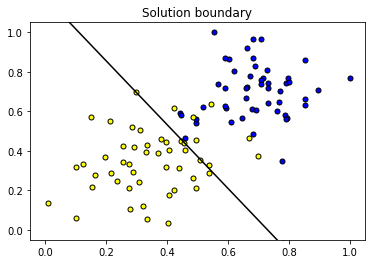

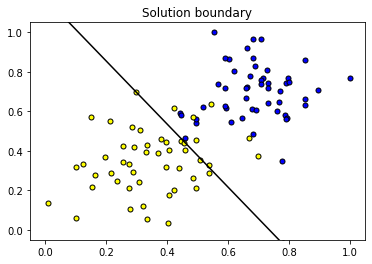

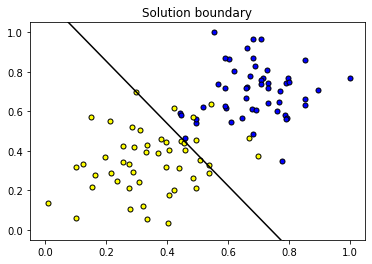

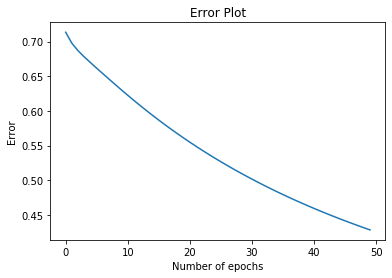

In [13]:
np.random.seed(44)
epochs = 50
learnrate = 0.01

trainned_model = train(features=X,
                       targets=y,
                       epochs=epochs,
                       learnrate=learnrate,
                       graph_lines=True)

---